### Documentación útil sobre KOI
Documentación para leer los datos de KOI (*Kepler Object of Interest*).

[GoTo_Metadata](#metadata)  
[GoTo_LightCurve](#lightcurve)

In [4]:
### imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<a id="metadata"></a>
# LOAD METADATA

### set folder

In [5]:
folder = "/work/work_teamEXOPLANET/K2_mission/"

### read mask of sets
> Not Yet

In [ ]:
df_sets = pd.read_csv(folder+"/koi_sets_unb.csv") 
mask_train = (df_sets["Set"] == "Train").values
mask_test = (df_sets["Set"] == "Test").values ##validacion
mask_unlabeled = (df_sets["Set"] == "Unlabeled").values  ##test
df_sets.head()

In [ ]:
arreglo = np.zeros(df_sets.shape[0], dtype='object')

labeled = np.arange(len(arreglo))[~mask_unlabeled]
mask_test = np.random.rand(labeled.shape[0]) < 0.3

labeled_train = labeled[~mask_test]
labeled_test =  labeled[mask_test]

arreglo[labeled_train] = "Train"
arreglo[labeled_test] = "Test"
arreglo[mask_unlabeled] = "Unlabeled"

arreglo

In [ ]:
df_sets = pd.read_csv(folder+"/koi_sets_unb.csv") 
df_sets["Set"] = arreglo

df_sets.to_csv(folder+"/koi_sets.csv", index=False)

### read metadata and apply mask

In [9]:
df_meta = pd.read_csv(folder+"/K2_CAND_metadata.csv")
#df_meta_train = df_meta[mask_train]
#df_meta_test = df_meta[mask_test]
#df_meta_unb = df_meta[mask_unlabeled]

print(df_meta.shape)
df_meta.head()

(1442, 19)


,EPIC Name,K2 Name,K2 Disposition,NExScI Disposition,Period,First Transit Time (BJD),Duration,Impact Parameter,Inclination,a/R,r/R,Teq,Transit Depth,Planet Radius,Teff,log(g),Metallicity,Stellar Radius,Time of Transit Epoch
0,EPIC 201092629.01,K2-241 b,CONFIRMED,CONFIRMED,26.819900,2.457584e+06,0.170800,0.41,NaN,43.300000,0.03120,507.0,0.090,2.550,NaN,NaN,NaN,NaN,2751.20630
1,EPIC 201102594.01,K2-242 b,CONFIRMED,CONFIRMED,6.513890,2.457586e+06,0.083300,0.42,NaN,22.100000,0.06330,416.0,0.624,2.540,NaN,NaN,NaN,NaN,2753.24000
2,EPIC 201110617.01,K2-156 b,CONFIRMED,CONFIRMED,0.813149,2.457583e+06,NaN,NaN,84.005,4.420602,0.01704,NaN,NaN,1.144,4460.0,4.68,-0.33,0.62,2750.14093
3,EPIC 201111557.01,NaN,CANDIDATE,CANDIDATE,2.301830,2.457583e+06,0.079200,0.42,NaN,11.800000,0.01440,1054.0,2.268,1.120,NaN,NaN,NaN,NaN,2750.16880
4,EPIC 201126503.01,NaN,CANDIDATE,CANDIDATE,1.194749,2.456810e+06,0.080417,0.00,NaN,NaN,0.06005,NaN,0.448,4.190,3919.0,NaN,NaN,0.57,1977.38200


In [10]:
df_meta.columns

Index(['EPIC Name', 'K2 Name', 'K2 Disposition', 'NExScI Disposition',
       'Period', 'First Transit Time (BJD)', 'Duration', 'Impact Parameter',
       'Inclination', 'a/R', 'r/R', 'Teq', 'Transit Depth', 'Planet Radius',
       'Teff', 'log(g)', 'Metallicity', 'Stellar Radius',
       'Time of Transit Epoch'],
      dtype='object')

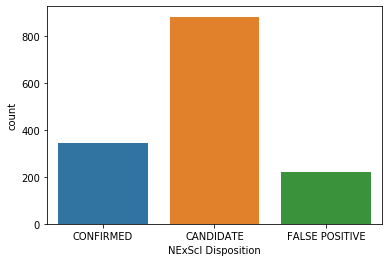

In [12]:
sns.countplot(data=df_meta, x="NExScI Disposition")
plt.show()

### Impute median on nulls!


In [13]:
def impute_on_pandas(df):
    return df.fillna(df.median(),inplace=False)

df_meta = impute_on_pandas(df_meta)
df_meta.head()

,EPIC Name,K2 Name,K2 Disposition,NExScI Disposition,Period,First Transit Time (BJD),Duration,Impact Parameter,Inclination,a/R,r/R,Teq,Transit Depth,Planet Radius,Teff,log(g),Metallicity,Stellar Radius,Time of Transit Epoch
0,EPIC 201092629.01,K2-241 b,CONFIRMED,CONFIRMED,26.819900,2.457584e+06,0.170800,0.41,88.113,43.300000,0.03120,507.0,0.090,2.550,5330.0,4.43,-0.02,0.87,2751.20630
1,EPIC 201102594.01,K2-242 b,CONFIRMED,CONFIRMED,6.513890,2.457586e+06,0.083300,0.42,88.113,22.100000,0.06330,416.0,0.624,2.540,5330.0,4.43,-0.02,0.87,2753.24000
2,EPIC 201110617.01,K2-156 b,CONFIRMED,CONFIRMED,0.813149,2.457583e+06,0.114100,0.42,84.005,4.420602,0.01704,821.0,0.162,1.144,4460.0,4.68,-0.33,0.62,2750.14093
3,EPIC 201111557.01,NaN,CANDIDATE,CANDIDATE,2.301830,2.457583e+06,0.079200,0.42,88.113,11.800000,0.01440,1054.0,2.268,1.120,5330.0,4.43,-0.02,0.87,2750.16880
4,EPIC 201126503.01,NaN,CANDIDATE,CANDIDATE,1.194749,2.456810e+06,0.080417,0.00,88.113,17.225461,0.06005,821.0,0.448,4.190,3919.0,4.43,-0.02,0.57,1977.38200


### Set ground truth

In [14]:
y = ((df_meta["NExScI Disposition"]=="CONFIRMED")*1).values
y

array([1, 1, 1, ..., 0, 0, 0])

### Evaluate models

/opt/ohpc/pub/moduledeps/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Precision raw,Recall raw,F1 raw,F1 weighted,F1 macro,F1 micro
False Positive,0.000000,0.0,0.000000,0.090933,0.191704,0.237171
Confirmed,0.237171,1.0,0.383408,0.090933,0.191704,0.237171


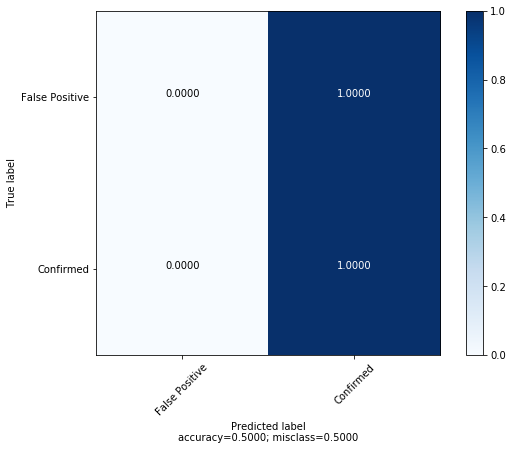

{'Precision raw': array([0.       , 0.2371706]),
 'Recall raw': array([0., 1.]),
 'F1 raw': array([0.        , 0.38340807]),
 'F1 weighted': 0.09093312103891582,
 'F1 macro': 0.1917040358744395,
 'F1 micro': 0.23717059639389737,
 'Confusion Matrix': array([[   0, 1100],
        [   0,  342]])}

In [15]:
import os, sys
dirpath = os.getcwd().split("code")[0]+"code/"
sys.path.append(dirpath)

from evaluation import calculate_metrics
calculate_metrics(y,np.ones((y.shape[0],1)))

<a id="lightcurve"></a>
# LOAD KEPLER LIGHT CURVES 

In [17]:
#curvas originales (coupled)
lc_measurements = np.load(folder+"K2_CAND_lc_detr.npy", allow_pickle=True)
lc_time = np.load(folder+"K2_CAND_time.npy", allow_pickle=True)
len(lc_time)

1442

In [18]:
#curvas processed by KEpler pipeline (contiene nans)
process_lc = np.load(folder+'/K2_CAND_LC_processed.npy', allow_pickle=True)
lc_time_aux = np.load(folder+'/K2_CAND_LC_processed_time.npy', allow_pickle=True)
len(lc_time_aux)

1442